In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

/mnt/arquivos_linux/miniconda3/envs/wilecamp/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/mnt/arquivos_linux/miniconda3/envs/wilecamp/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
base_dataset = "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/Datasets/dataset_TPV/base_pump_23042023_A_resampled_10min"

df = pd.read_csv(f"{base_dataset}/base_pump_23042023_A_resampled_10min.csv")

print(df.keys())

x = list(range(len(df["temperature"].tolist())))
y = df["temperature"].tolist()
x_time = df["Time"].tolist()

Index(['Time', 'InletPressure', 'OutletPressure', 'OutletTemperature',
       'InverterSpeed', 'temperature', 'frequency', 'phaseA_voltage',
       'phaseA_current', 'phaseA_pwr_factor', 'phaseA_active',
       'phaseA_reactive', 'phaseB_voltage', 'phaseB_current',
       'phaseB_pwr_factor', 'phaseB_active', 'phaseB_reactive',
       'phaseC_voltage', 'phaseC_current', 'phaseC_pwr_factor',
       'phaseC_active', 'phaseC_reactive', 'OAVelocity_x', 'Peakmg_x',
       'RMSmg_x', 'Kurtosis_x', 'CrestFactor_x', 'Skewness_x', 'Deviation_x',
       'Peak-to-Peak Displacement_x', 'OAVelocity_y', 'Peakmg_y', 'RMSmg_y',
       'Kurtosis_y', 'CrestFactor_y', 'Skewness_y', 'Deviation_y',
       'Peak-to-Peak Displacement_y', 'OAVelocity_z', 'Peakmg_z', 'RMSmg_z',
       'Kurtosis_z', 'CrestFactor_z', 'Skewness_z', 'Deviation_z',
       'Peak-to-Peak Displacement_z'],
      dtype='object')


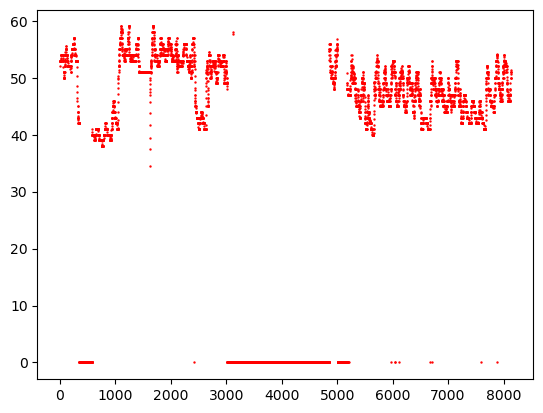

In [3]:
x = list(range(len(df["temperature"].tolist())))
y = df["temperature"].tolist()
x_time = df["Time"].tolist()

import matplotlib.pyplot as plt

plt.scatter(x, y, s=0.5, color="red")

In [4]:
zero_indices = [index for index, value in enumerate(y) if value == 0]
# 3016
zero_indices[0], zero_indices[-1]

(348, 7881)

In [5]:
df_ = df# [df["temperature"]!=0]

x = list(range(len(df_["temperature"].tolist())))
y = df_["temperature"].tolist()
x_time = df_["Time"].tolist()

print(len(x), len(x_time))

8134 8134


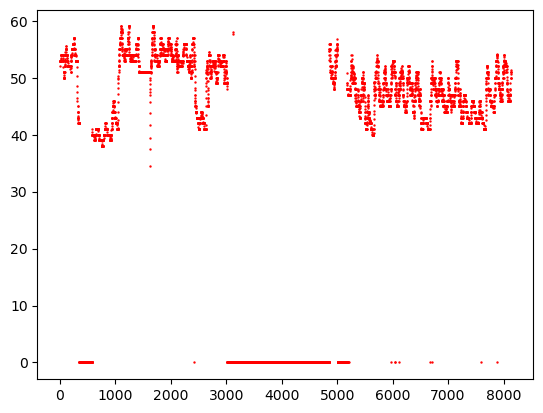

In [6]:
plt.scatter(x, y, s=0.5, color="red")

In [7]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")

from utils.read_dataset import ReadDatasets
import numpy as np

df_ = pd.DataFrame({'ds':x_time, 'y':y})

df_ = df_.replace(0.0, np.nan)
df_= df_.dropna()
df_.shape

(5885, 2)

5885 5885


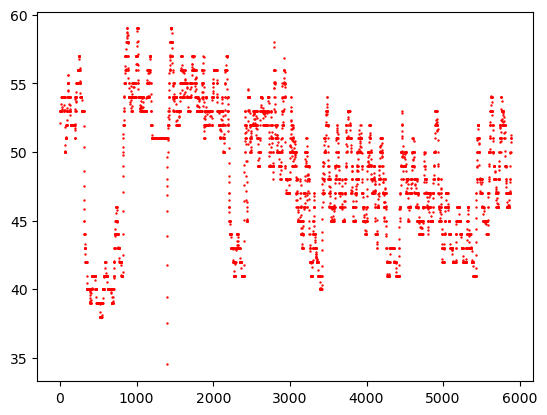

In [8]:
# df_ = df# [df["temperature"]!=0]

x = list(range(len(df_["y"].tolist())))
y = df_["y"].tolist()
x_time = df_["ds"].tolist()

print(len(x), len(x_time))

plt.scatter(x, y, s=0.5, color="red")

In [38]:
# m = NeuralProphet(growth="discontinuous",
#                   n_changepoints=10,
#                   seasonality_mode="multiplicative",#"additive",#
#                   # loss_func="MAE",
#                   trend_reg_threshold=True,
#                   weekly_seasonality=True,
#                   daily_seasonality=True,
#                   epochs=1000)

m = NeuralProphet(growth="discontinuous",
                  n_changepoints=10,
                  seasonality_mode="multiplicative",#"additive",#
                  loss_func="MAE",
                  trend_reg_threshold=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  epochs=1000)

metrics = m.fit(df_train)

INFO - (NP.config.__post_init__) - Trend reg threshold ignored due to reg lambda <= 0.


NameError: name 'df_train' is not defined

In [13]:
forecast = m.predict(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.605% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T


Predicting: 95it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [14]:
# m.set_plotting_backend('matplotlib')
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

### Avaliable model

In [15]:
future = m.make_future_dataframe(df_,
                                 periods=6,
                                 n_historic_predictions=len(df))

forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T


Predicting: 95it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [18]:
forecast

,ds,y,yhat1,trend,season_weekly,season_daily
0,2023-02-16 02:40:00,52.097561,53.903442,53.041988,1.842772,-0.981315
1,2023-02-16 02:50:00,53.000000,53.918530,53.033661,1.822448,-0.937580
2,2023-02-16 03:00:00,53.000000,53.938698,53.025333,1.802130,-0.888765
3,2023-02-16 03:10:00,53.000000,53.961159,53.017006,1.781823,-0.837669
4,2023-02-16 03:20:00,53.000000,53.983006,53.008678,1.761529,-0.787203
...,...,...,...,...,...,...
8135,2023-04-13 14:30:00,NaN,30.944700,30.302887,0.373382,0.268431
8136,2023-04-13 14:40:00,NaN,31.004805,30.299282,0.367860,0.337661
8137,2023-04-13 14:50:00,NaN,31.068876,30.295679,0.362515,0.410681
8138,2023-04-13 15:00:00,NaN,31.135122,30.292076,0.357349,0.485697


## Plots dataSensors

In [10]:
df.keys()

Index(['Time', 'InletPressure', 'OutletPressure', 'OutletTemperature',
       'InverterSpeed', 'temperature', 'frequency', 'phaseA_voltage',
       'phaseA_current', 'phaseA_pwr_factor', 'phaseA_active',
       'phaseA_reactive', 'phaseB_voltage', 'phaseB_current',
       'phaseB_pwr_factor', 'phaseB_active', 'phaseB_reactive',
       'phaseC_voltage', 'phaseC_current', 'phaseC_pwr_factor',
       'phaseC_active', 'phaseC_reactive', 'OAVelocity_x', 'Peakmg_x',
       'RMSmg_x', 'Kurtosis_x', 'CrestFactor_x', 'Skewness_x', 'Deviation_x',
       'Peak-to-Peak Displacement_x', 'OAVelocity_y', 'Peakmg_y', 'RMSmg_y',
       'Kurtosis_y', 'CrestFactor_y', 'Skewness_y', 'Deviation_y',
       'Peak-to-Peak Displacement_y', 'OAVelocity_z', 'Peakmg_z', 'RMSmg_z',
       'Kurtosis_z', 'CrestFactor_z', 'Skewness_z', 'Deviation_z',
       'Peak-to-Peak Displacement_z'],
      dtype='object')

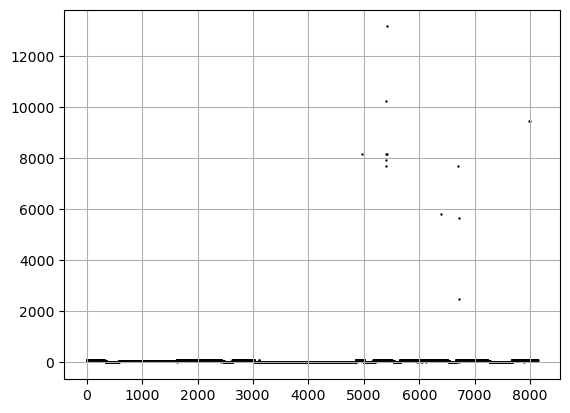

In [56]:
feature = "OutletTemperature"

x = list(range(len(df[feature].tolist())))
y = df[feature].tolist()
x_time = df["Time"].tolist()

import matplotlib.pyplot as plt

plt.scatter(x, y, s=0.5, color="black")
plt.grid()
#plt.ylim(-5, 100)


In [ ]:
# InverterSpeed
# phaseB_voltage
# phaseB_current
# phaseC_voltage
# phaseC_current
# temperature
# OutletTemperature

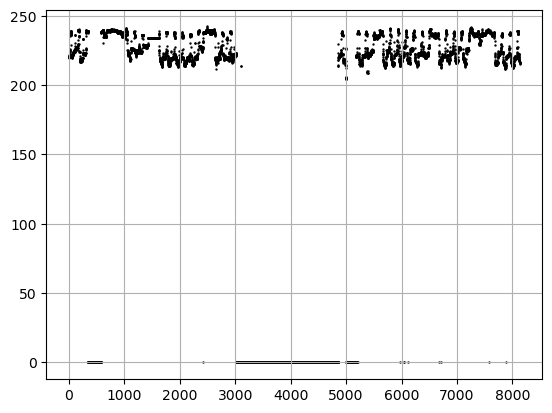

In [32]:
feature = "phaseB_voltage"

x = list(range(len(df[feature].tolist())))
y = df[feature].tolist()
x_time = df["Time"].tolist()

import matplotlib.pyplot as plt

plt.scatter(x, y, s=0.5, color="black")
plt.grid()

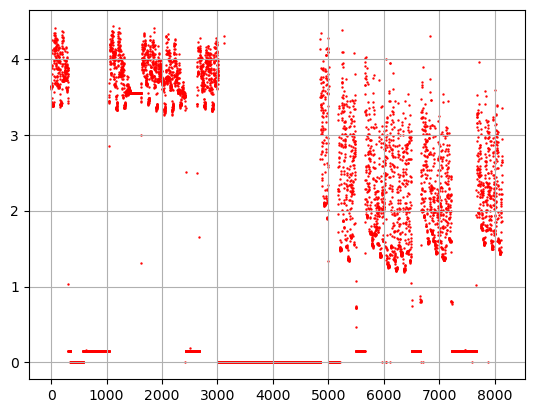

In [30]:
# phaseB_current

feature = "phaseB_current"

x = list(range(len(df[feature].tolist())))
y = df[feature].tolist()
x_time = df["Time"].tolist()

import matplotlib.pyplot as plt

plt.scatter(x, y, s=0.5, color="black")
plt.grid()